In [77]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy.stats import mstats
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import LabelEncoder


import warnings
warnings.filterwarnings("ignore")   # Ignore all warnings

In [78]:
df = pd.read_csv('/content/drive/MyDrive/vehicles.csv')
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [79]:
df.shape

(426880, 26)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [81]:
df.describe()

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


In [82]:
remove_features = ['id','url','region','region_url','model','image_url','description','posting_date','county','VIN','lat','long']
df = df.drop(remove_features, axis=1)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         426880 non-null  int64  
 1   year          425675 non-null  float64
 2   manufacturer  409234 non-null  object 
 3   condition     252776 non-null  object 
 4   cylinders     249202 non-null  object 
 5   fuel          423867 non-null  object 
 6   odometer      422480 non-null  float64
 7   title_status  418638 non-null  object 
 8   transmission  424324 non-null  object 
 9   drive         296313 non-null  object 
 10  size          120519 non-null  object 
 11  type          334022 non-null  object 
 12  paint_color   296677 non-null  object 
 13  state         426880 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 45.6+ MB


In [84]:
# dealing with missing values

df.isnull().sum()

price                0
year              1205
manufacturer     17646
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [85]:
df.head(30)

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
5,1600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
6,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
7,15995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
8,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,or
9,3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pa


The first 28 rows have  price but no imformation on most of the independent features so we are removing it from dataset

In [86]:
# code to remove first 28 rows

df = df.iloc[27:]

In [87]:
df.head()

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
27,33590,2014.0,gmc,good,8 cylinders,gas,57923.0,clean,other,NaN,NaN,pickup,white,al
28,22590,2010.0,chevrolet,good,8 cylinders,gas,71229.0,clean,other,NaN,NaN,pickup,blue,al
29,39590,2020.0,chevrolet,good,8 cylinders,gas,19160.0,clean,other,NaN,NaN,pickup,red,al
30,30990,2017.0,toyota,good,8 cylinders,gas,41124.0,clean,other,NaN,NaN,pickup,red,al
31,15000,2013.0,ford,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,al


### Working on Price (target) columns

In [88]:
# removing the records where price is zero

df = df[df['price'] >= 100]


<Axes: xlabel='price'>

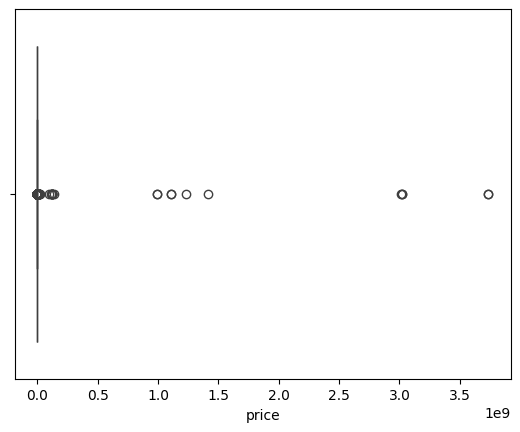

In [89]:
# finding the outlier in price column

sns.boxplot(x=df['price'])


+ There are outlier in extreme highs that can affect the evaluation metrics of predictive model.

In [90]:
# calculate the outlier using interquartiile range for columns'

def find_outliers(df, column_name):
    """
    Find outliers in a DataFrame column using the interquartile range (IQR) method.

    Args:
        df (DataFrame): The DataFrame containing the column.
        column_name (str): The name of the column to find outliers in.

    Returns:
        outliers (DataFrame): DataFrame containing the outliers.
    """
    # Calculate the interquartile range (IQR)
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find the outliers
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

    # Print the number of outliers
    print(f"Number of outliers in {column_name}: {len(outliers)}")

    return outliers


In [91]:
outliers_df = find_outliers(df, 'price')
print(outliers_df)

Number of outliers in price: 7741
            price    year manufacturer condition    cylinders    fuel  \
204         58977  2019.0          gmc       NaN          NaN     gas   
280     987654321  1960.0    chevrolet       NaN          NaN     gas   
346         98900  2001.0      ferrari      good  8 cylinders     gas   
365         72900  2021.0    chevrolet      good  8 cylinders     gas   
461         99950  2021.0    chevrolet       NaN          NaN     gas   
...           ...     ...          ...       ...          ...     ...   
426694      59900  2014.0         ford       NaN          NaN  diesel   
426716      65950  2020.0         ford  like new  8 cylinders  diesel   
426778      65995  2020.0          gmc      good  8 cylinders     gas   
426810      58995  2017.0          gmc       NaN  8 cylinders  diesel   
426840      65999  2017.0          NaN       NaN          NaN  diesel   

        odometer title_status transmission drive       size         type  \
204      6636

In [92]:
# checking for values in 5th percentile and 95th percentile
percentile_5 = df['price'].quantile(0.05)
percentile_95 = df['price'].quantile(0.95)

print("The 5th percentile : ", percentile_5)
print("The 95th percentile : ", percentile_95)

The 5th percentile :  2300.0
The 95th percentile :  45000.0


The 95th percentile value is too low. That means majority of data lies from USD 1000 to  USD 50,000. But we have some of the car values in millions.

In [93]:
# prompt: find the records pwhere price > 1000000

outliers_price = df[df['price'] > 1000000]
print(outliers_price)


             price    year   manufacturer  condition    cylinders    fuel  \
280      987654321  1960.0      chevrolet        NaN          NaN     gas   
1838      99999999  1993.0           ford        NaN          NaN     gas   
26075      1111111  2014.0      chevrolet        NaN          NaN   other   
29386   1111111111  1999.0           ford       good  8 cylinders  diesel   
37409   1111111111  2020.0           jeep        NaN          NaN     gas   
37410   3009548743  2021.0      chevrolet        NaN  8 cylinders     gas   
68935      2000000  2002.0         saturn       good  4 cylinders     gas   
91576   3024942282  2000.0  mercedes-benz        NaN          NaN     gas   
105843     6995495  2014.0          dodge        NaN  4 cylinders     gas   
122470   987654321  1960.0      chevrolet        NaN          NaN     gas   
136516    17000000  2007.0            ram       good  8 cylinders  diesel   
137807   123456789  1999.0          buick   like new  6 cylinders     gas   

from the data itself we can see this is false information poised on Craigslist website from where the data was scraped.

In [94]:
# prompt: remove the record where  the price > 1000000

df = df[df['price'] < 1000000]


In [95]:
df.shape

(390576, 14)

<Axes: xlabel='price'>

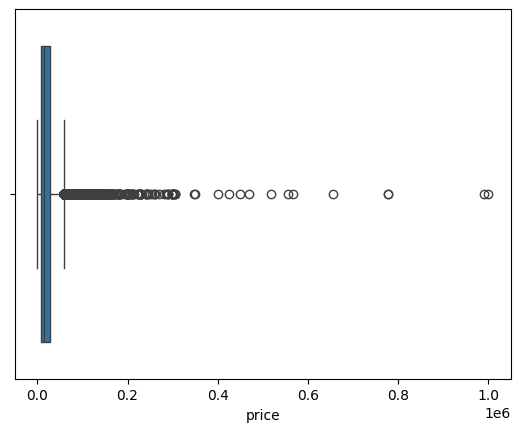

In [96]:
sns.boxplot(x=df['price'])

In [97]:
# applying log transformation on price

import numpy as np
# Apply log transformation on price
df['price'] = np.log(df['price'])

# # Inverse transformation
# def inverse_log_transform(log_price):
#   return np.exp(log_price)


<Axes: xlabel='price'>

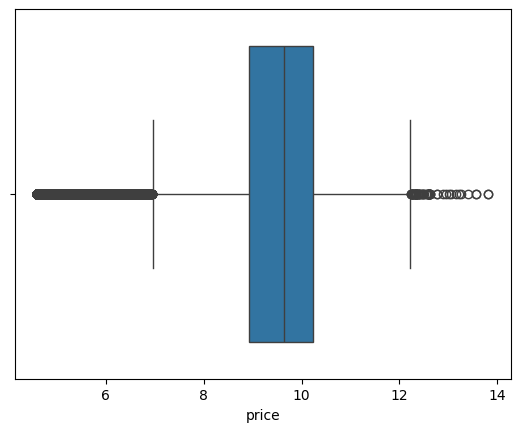

In [98]:
sns.boxplot(x=df['price'])

### Analysis on numerical columns

In [99]:
# prompt: find all the columns  that is not object type

numerical_cols = df.select_dtypes(exclude='object').columns
print(numerical_cols)


Index(['price', 'year', 'odometer'], dtype='object')


#### Analysis on year

In [100]:
# substract the year column by year 2023 and rewrite the year column in df

df['year'] = 2023 - df['year']
df.head()

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
27,10.421984,9.0,gmc,good,8 cylinders,gas,57923.0,clean,other,NaN,NaN,pickup,white,al
28,10.025263,13.0,chevrolet,good,8 cylinders,gas,71229.0,clean,other,NaN,NaN,pickup,blue,al
29,10.586332,3.0,chevrolet,good,8 cylinders,gas,19160.0,clean,other,NaN,NaN,pickup,red,al
30,10.341420,6.0,toyota,good,8 cylinders,gas,41124.0,clean,other,NaN,NaN,pickup,red,al
31,9.615805,10.0,ford,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,al


In [101]:
outliers_df = find_outliers(df, 'year')
print(outliers_df)

Number of outliers in year: 15287
           price   year   manufacturer  condition    cylinders fuel  odometer  \
37      8.411833   31.0           jeep  excellent  6 cylinders  gas  192000.0   
101     9.471935   55.0          volvo        NaN          NaN  gas   99999.0   
137     7.824046   57.0            NaN       good  6 cylinders  gas   47000.0   
208     7.824046   47.0      chevrolet        NaN          NaN  gas     100.0   
210     7.170120   54.0  mercedes-benz        NaN          NaN  gas   12774.0   
...          ...    ...            ...        ...          ...  ...       ...   
426729  9.903488   72.0           jeep   like new  4 cylinders  gas   14409.0   
426762  8.853665   41.0          mazda  excellent        other  gas   80000.0   
426809  9.798127   33.0           jeep       good  8 cylinders  gas  114400.0   
426831  9.190138   38.0         nissan   like new  6 cylinders  gas  115000.0   
426838  9.994242  103.0            NaN       good  6 cylinders  gas   11065

<Axes: xlabel='year'>

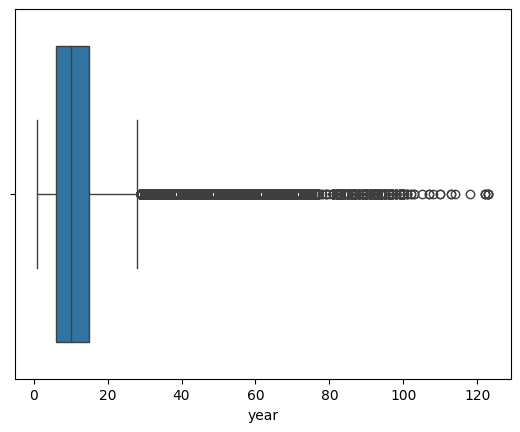

In [102]:
sns.boxplot(x=df['year'])

In [103]:
# checking for values in 5th percentile and 95th percentile
percentile_5 = df['year'].quantile(0.05)
percentile_95 = df['year'].quantile(0.95)

print("The 5th percentile : ", percentile_5)
print("The 95th percentile : ", percentile_95)

The 5th percentile :  3.0
The 95th percentile :  25.0


+ the 95th percentile starts from 24 years and IQR outlier range starts from 30 years. So we need to find the closed percentile so we can use Winsorization to replace the extreme highs.

In [104]:
# applying Winsorization method
df['year'] = mstats.winsorize(df['year'], limits=(None, 0.03))

#### Analysis on odometer

In [105]:
# remove records for odometer less than 100 from df

df = df[df['odometer'] > 100]


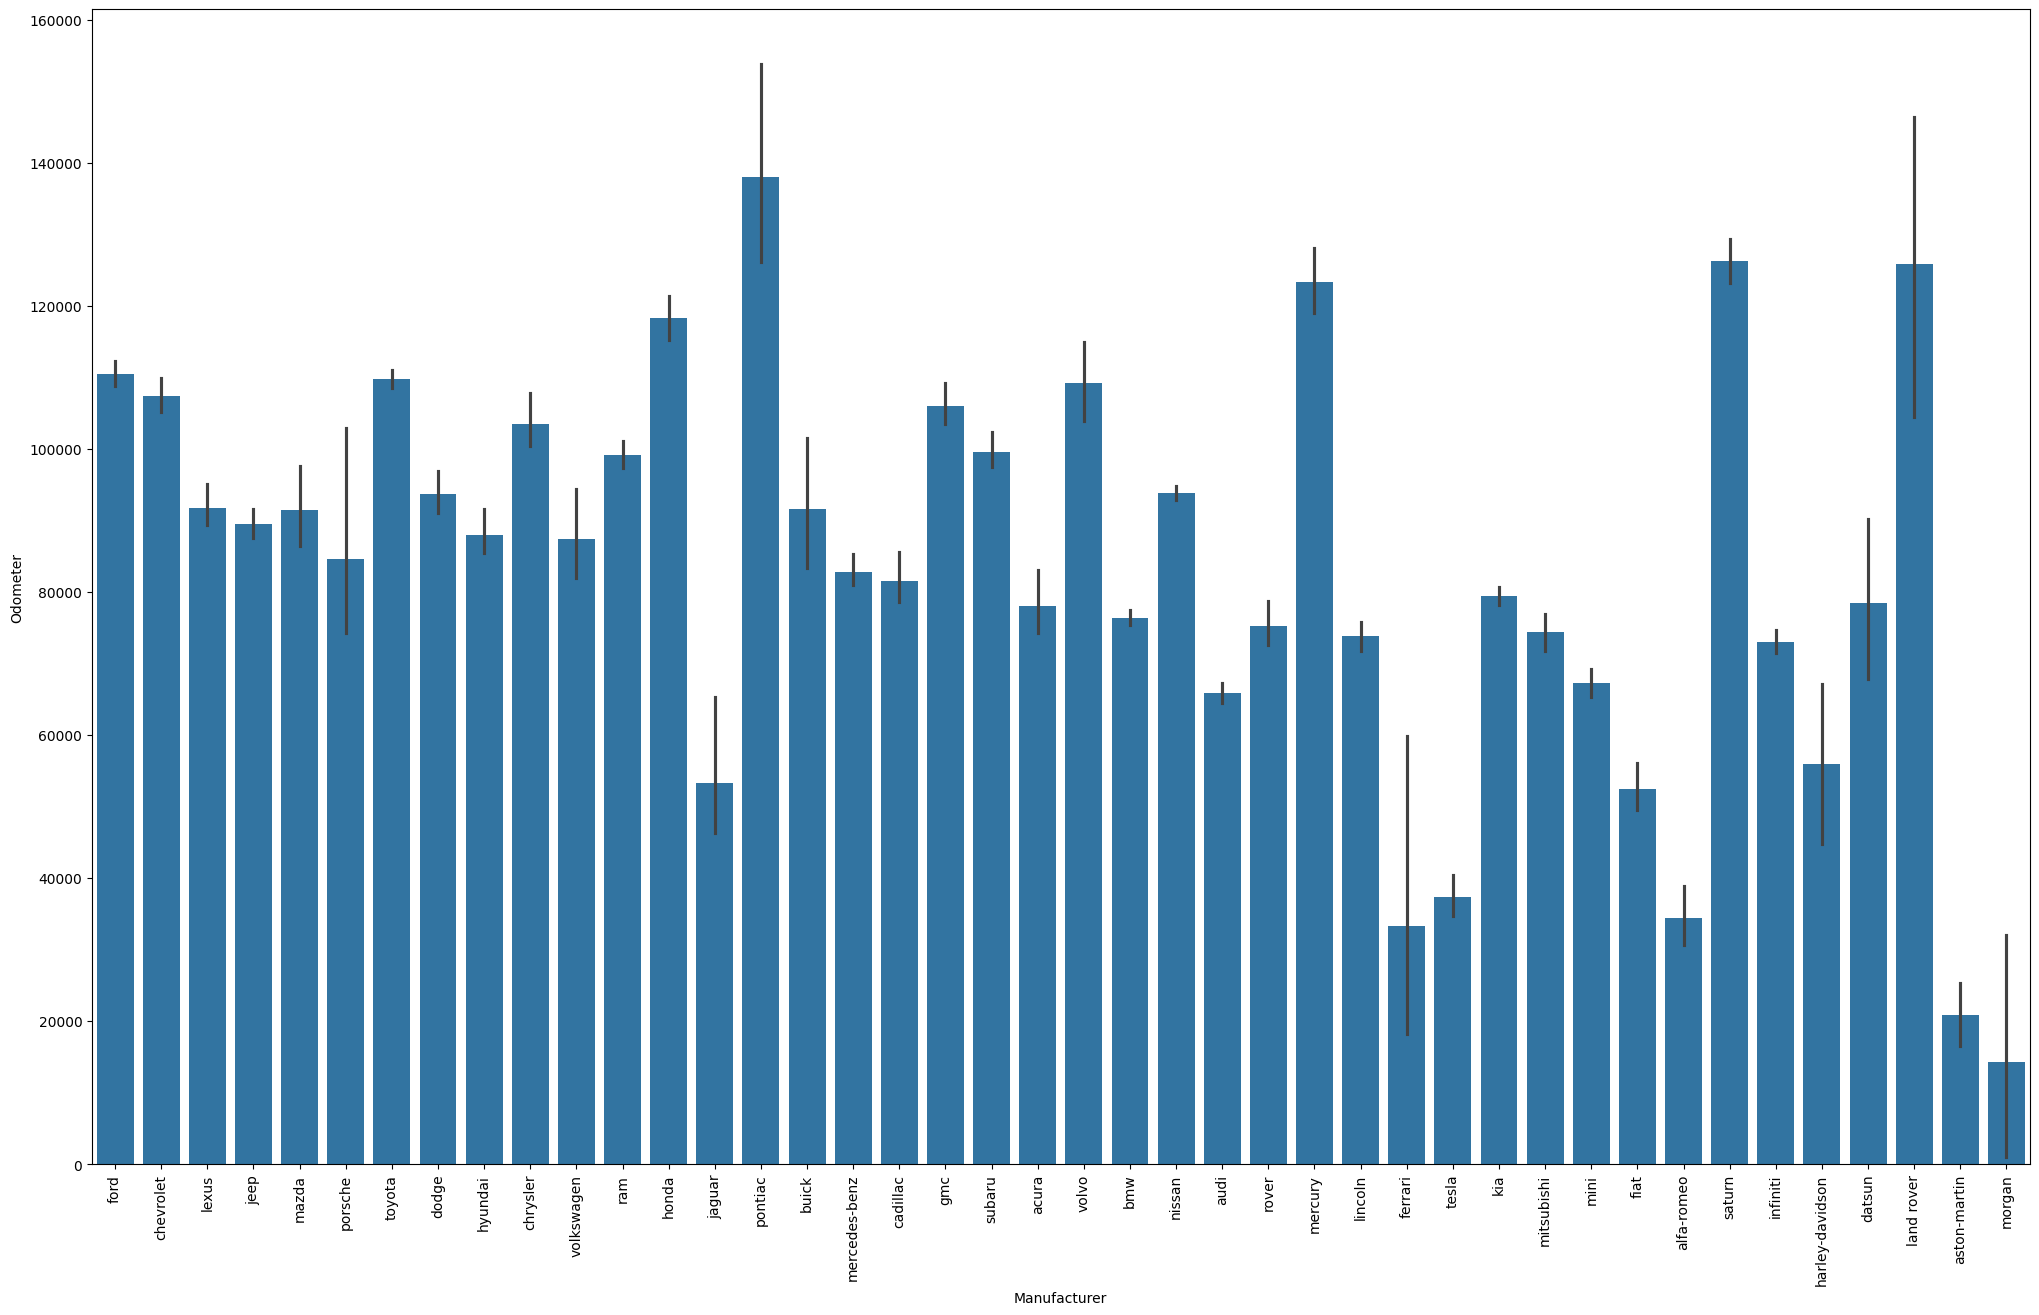

In [106]:
df=df.sort_values(by=['odometer'],ascending=False)
plt.figure(figsize=(25,15))
sns.barplot(x=df.manufacturer, y=df.odometer)
plt.xticks(rotation= 90)
plt.xlabel('Manufacturer')
plt.ylabel('Odometer')
plt.show()

<Axes: xlabel='odometer'>

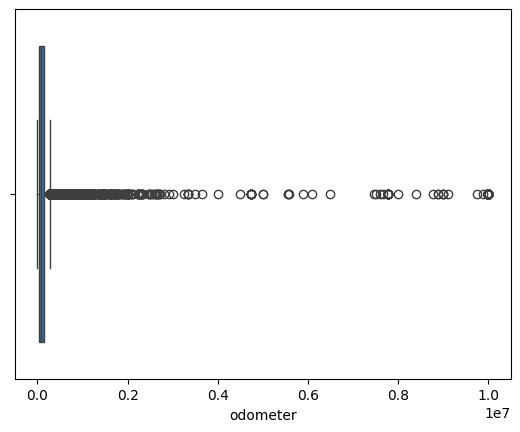

In [107]:
# find presence of outlier in odometer column in df

sns.boxplot(x=df['odometer'])


In [108]:
outliers_df = find_outliers(df, 'odometer')
print(outliers_df)

Number of outliers in odometer: 3797
           price  year manufacturer  condition    cylinders fuel    odometer  \
144436  8.411833  13.0         ford       good  4 cylinders  gas  10000000.0   
110623  6.109248  23.0         ford        NaN          NaN  gas  10000000.0   
106192  6.214608  13.0    chevrolet        NaN          NaN  gas  10000000.0   
386655  8.853665  36.0          NaN       fair  4 cylinders  gas  10000000.0   
152394  8.160518  36.0         ford       good          NaN  gas  10000000.0   
...          ...   ...          ...        ...          ...  ...         ...   
389830  7.824046  18.0       subaru       good  4 cylinders  gas    281555.0   
424864  8.516593  14.0       toyota        NaN          NaN  gas    281487.0   
424073  8.516593  14.0       toyota        NaN          NaN  gas    281487.0   
422911  8.516593  14.0       toyota        NaN          NaN  gas    281487.0   
31336   8.853523  16.0       toyota  excellent  8 cylinders  gas    281370.0   

  

In [109]:
# checking for values in 5th percentile and 95th percentile
percentile_5 = df['odometer'].quantile(0.05)
percentile_95 = df['odometer'].quantile(0.95)

print("The 5th percentile : ", percentile_5)
print("The 95th percentile : ", percentile_95)

The 5th percentile :  9173.0
The 95th percentile :  206010.79999999993


Findings:

+ There is no outliers on extreme low.
+ The 95th percentile starts from 206000 km but outlier through IQR starts from 277302 km. So we will match the percentile and outlier and then apply Winsorization only to the upper extreme values.  Winsorization is a method that replaces extreme values with less extreme values.

In [110]:
# applying Winsorization method
df['odometer'] = mstats.winsorize(df['odometer'], limits=(None, 0.02))

In [111]:
df.describe()

,price,year,odometer
count,383183.000000,383183.000000,383183.000000
mean,9.480971,11.519538,93462.880279
std,1.007176,7.215660,61752.780631
min,4.605170,1.000000,101.000000
25%,8.922658,6.000000,39735.500000
50%,9.654385,10.000000,88544.000000
75%,10.236382,15.000000,136363.000000
max,13.815510,36.000000,245000.000000


<Axes: xlabel='odometer'>

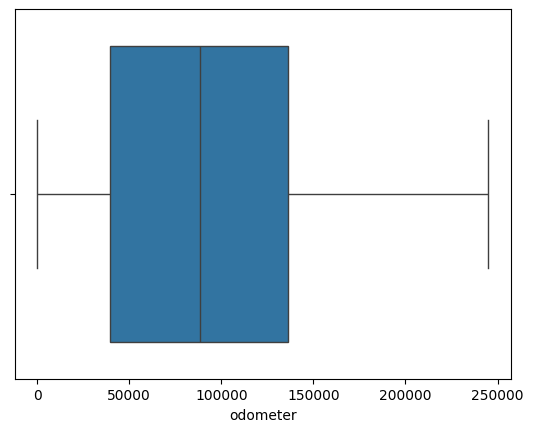

In [112]:

sns.boxplot(x=df['odometer'])

In [113]:
# find missing values in odometer

missing_odometer = df['odometer'].isnull().sum()
print(f"Number of missing values in odometer: {missing_odometer}")


Number of missing values in odometer: 0


### Analysis on Categorical Columns

#### Analysis on cylinders column

In [114]:
# Replace 'cylinders ' from string values in the 'cylinders' column
df['cylinders'] = df['cylinders'].apply(lambda x: x.replace(' cylinders', '') if isinstance(x, str) else x)

In [115]:
# find unique values of cylinders column

df['cylinders'].unique()


array(['4', nan, '8', '6', 'other', '5', '3', '10', '12'], dtype=object)

In [116]:
# change 'others' in cylinders column to nan

df['cylinders'] = df['cylinders'].replace('other', np.nan)


In [117]:
df['cylinders'].unique()

array(['4', nan, '8', '6', '5', '3', '10', '12'], dtype=object)

In [118]:
# code to replace object type into int type in cylinders column without touching missing values

df['cylinders'] = df['cylinders'].apply(pd.to_numeric, errors='ignore')


In [119]:
df['cylinders'].unique()

array([ 4., nan,  8.,  6.,  5.,  3., 10., 12.])

#### Analysis on manufacturer

In [120]:
# prompt: find the unique values in manufacturer column and its frequency

manufacturer_counts = df['manufacturer'].value_counts()
print(manufacturer_counts)


ford               63330
chevrolet          49008
toyota             30909
honda              19495
nissan             17017
jeep               16908
ram                16134
gmc                15086
bmw                13466
dodge              11924
mercedes-benz      10039
hyundai             9155
subaru              8819
volkswagen          8555
lexus               7607
kia                 7338
audi                7062
cadillac            6361
acura               5620
chrysler            5514
buick               5023
mazda               4933
infiniti            4406
lincoln             3974
volvo               3232
mitsubishi          2934
mini                2225
pontiac             2177
rover               1949
jaguar              1808
porsche             1279
mercury             1119
saturn              1056
alfa-romeo           852
tesla                839
fiat                 761
harley-davidson      134
ferrari               79
datsun                58
aston-martin          21


In [121]:
# removing the record if manufacturer_counts <1000 from df

df = df[df['manufacturer'].isin(manufacturer_counts[manufacturer_counts > 1000].index)]


In [122]:
# categorical columns

categorical_cols = [col for col in df.columns if df[col].dtype == 'object']
print(categorical_cols)


['manufacturer', 'condition', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color', 'state']


In [123]:
# prompt: find the unique values of all the columns in list categorical_cols

for col in categorical_cols:
  unique_values = df[col].unique()
  print(f"Unique values for column '{col}': {unique_values}")


Unique values for column 'manufacturer': ['ford' 'chevrolet' 'lexus' 'jeep' 'mazda' 'porsche' 'toyota' 'dodge'
 'hyundai' 'chrysler' 'volkswagen' 'ram' 'honda' 'jaguar' 'pontiac'
 'buick' 'mercedes-benz' 'cadillac' 'gmc' 'subaru' 'acura' 'volvo' 'bmw'
 'nissan' 'audi' 'rover' 'mercury' 'lincoln' 'kia' 'mitsubishi' 'mini'
 'saturn' 'infiniti']
Unique values for column 'condition': ['good' nan 'fair' 'salvage' 'excellent' 'like new' 'new']
Unique values for column 'fuel': ['gas' 'diesel' nan 'other' 'hybrid' 'electric']
Unique values for column 'title_status': ['clean' 'rebuilt' 'parts only' 'missing' 'lien' 'salvage' nan]
Unique values for column 'transmission': ['automatic' 'other' 'manual' nan]
Unique values for column 'drive': [nan '4wd' 'rwd' 'fwd']
Unique values for column 'size': [nan 'compact' 'full-size' 'sub-compact' 'mid-size']
Unique values for column 'type': ['sedan' nan 'offroad' 'coupe' 'hatchback' 'truck' 'pickup' 'SUV' 'wagon'
 'convertible' 'other' 'van' 'mini-van' 'bus

converting others into nan and later on imputting those values

In [124]:
# change 'other' in fuel column to nan

df['fuel'] = df['fuel'].replace('other', np.nan)

In [125]:
# change 'missing' in title_staus column to nan

df['title_status'] = df['title_status'].replace('missing', np.nan)

In [126]:
# change 'other' in transmission column to nan

df['transmission'] = df['transmission'].replace('other', np.nan)

In [127]:
# change 'other' in type column to nan

df['type'] = df['type'].replace('other', np.nan)

In [128]:
for col in categorical_cols:
  unique_values = df[col].unique()
  print(f"Unique values for column '{col}': {unique_values}")

Unique values for column 'manufacturer': ['ford' 'chevrolet' 'lexus' 'jeep' 'mazda' 'porsche' 'toyota' 'dodge'
 'hyundai' 'chrysler' 'volkswagen' 'ram' 'honda' 'jaguar' 'pontiac'
 'buick' 'mercedes-benz' 'cadillac' 'gmc' 'subaru' 'acura' 'volvo' 'bmw'
 'nissan' 'audi' 'rover' 'mercury' 'lincoln' 'kia' 'mitsubishi' 'mini'
 'saturn' 'infiniti']
Unique values for column 'condition': ['good' nan 'fair' 'salvage' 'excellent' 'like new' 'new']
Unique values for column 'fuel': ['gas' 'diesel' nan 'hybrid' 'electric']
Unique values for column 'title_status': ['clean' 'rebuilt' 'parts only' nan 'lien' 'salvage']
Unique values for column 'transmission': ['automatic' nan 'manual']
Unique values for column 'drive': [nan '4wd' 'rwd' 'fwd']
Unique values for column 'size': [nan 'compact' 'full-size' 'sub-compact' 'mid-size']
Unique values for column 'type': ['sedan' nan 'offroad' 'coupe' 'hatchback' 'truck' 'pickup' 'SUV' 'wagon'
 'convertible' 'van' 'mini-van' 'bus']
Unique values for column 'paint

### handling the missing values using KNNimputer and SimpleImputer techniques

In [129]:
# Separate features and target variable
X = df.drop(columns=['price'])
y = df['price']

In [130]:
X.shape

(365462, 13)

In [131]:
X.isnull().sum()

year                 0
manufacturer         0
condition       140395
cylinders       147186
fuel             28153
odometer             0
title_status      7099
transmission     58391
drive           109410
size            262947
type             95336
paint_color     106677
state                0
dtype: int64

In [132]:
y.shape

(365462,)

In [133]:
def impute_missing_values(df):
    """
    Impute missing values in a dataframe using KNNImputer for numeric columns and SimpleImputer for categorical columns.

    Args:
        df: The dataframe to impute missing values in.

    Returns:
        A new dataframe with imputed missing values.
    """

    num_columns = ['odometer', 'year']
    cat_columns = ['cylinders','manufacturer','condition', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color', 'state']

    # Impute missing values in numeric columns using KNNImputer
    knn_imputer = KNNImputer(n_neighbors=5)
    numeric_cols_imputed = knn_imputer.fit_transform(df[num_columns])

    # Impute missing values in categorical columns using SimpleImputer
    simple_imputer = SimpleImputer(strategy='most_frequent')
    categorical_cols_imputed = simple_imputer.fit_transform(df[cat_columns])

    # Combine imputed columns and return new dataframe
    imputed_cols = np.concatenate((numeric_cols_imputed, categorical_cols_imputed), axis=1)
    imputed_cols_df = pd.DataFrame(imputed_cols, columns=num_columns + cat_columns)
    df_imputed = df.copy()
    df_imputed[num_columns + cat_columns] = imputed_cols_df
    return df_imputed


In [134]:
imputed_df = impute_missing_values(X)

In [135]:
imputed_df.head()

,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
144436,10.0,ford,excellent,4.0,gas,107168.0,clean,automatic,fwd,full-size,SUV,white,ky
110623,15.0,audi,excellent,6.0,gas,125186.0,clean,automatic,4wd,full-size,sedan,silver,id
106192,14.0,jeep,good,4.0,gas,128000.0,clean,automatic,4wd,full-size,sedan,white,tx
152394,16.0,honda,excellent,4.0,gas,103000.0,clean,automatic,fwd,full-size,SUV,silver,mi
23100,19.0,chevrolet,good,8.0,gas,197600.0,clean,automatic,4wd,full-size,SUV,black,mn


In [136]:
imputed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365462 entries, 144436 to 208221
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   year          312838 non-null  object
 1   manufacturer  312838 non-null  object
 2   condition     312838 non-null  object
 3   cylinders     312838 non-null  object
 4   fuel          312838 non-null  object
 5   odometer      312838 non-null  object
 6   title_status  312838 non-null  object
 7   transmission  312838 non-null  object
 8   drive         312838 non-null  object
 9   size          312838 non-null  object
 10  type          312838 non-null  object
 11  paint_color   312838 non-null  object
 12  state         312838 non-null  object
dtypes: object(13)
memory usage: 39.0+ MB


In [137]:
imputed_df.isnull().sum()

year            52624
manufacturer    52624
condition       52624
cylinders       52624
fuel            52624
odometer        52624
title_status    52624
transmission    52624
drive           52624
size            52624
type            52624
paint_color     52624
state           52624
dtype: int64

In [138]:
# combine price column to imputed df and make a new dataframe final_df
final_df = imputed_df.join(y)


In [139]:
final_df.tail()

,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,price
409848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.198201
94438,11.0,gmc,excellent,6.0,gas,134579.0,clean,automatic,fwd,full-size,SUV,grey,il,8.922658
328547,7.0,kia,good,6.0,gas,17631.0,clean,automatic,fwd,full-size,coupe,white,tn,6.551080
110032,8.0,gmc,good,6.0,gas,125699.0,clean,automatic,4wd,full-size,truck,white,tx,8.496990
208221,9.0,honda,excellent,4.0,gas,76000.0,rebuilt,automatic,4wd,mid-size,SUV,silver,oh,8.611594


In [140]:
# removing the record that has missing values

final_df = final_df.dropna()
final_df.isnull().sum()


year            0
manufacturer    0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
state           0
price           0
dtype: int64

In [141]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312838 entries, 144436 to 208221
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          312838 non-null  object 
 1   manufacturer  312838 non-null  object 
 2   condition     312838 non-null  object 
 3   cylinders     312838 non-null  object 
 4   fuel          312838 non-null  object 
 5   odometer      312838 non-null  object 
 6   title_status  312838 non-null  object 
 7   transmission  312838 non-null  object 
 8   drive         312838 non-null  object 
 9   size          312838 non-null  object 
 10  type          312838 non-null  object 
 11  paint_color   312838 non-null  object 
 12  state         312838 non-null  object 
 13  price         312838 non-null  float64
dtypes: float64(1), object(13)
memory usage: 35.8+ MB


### Handling Categorical features into numerical features

In [142]:
#applying one hot encoding on manufacturer column in df dataframe

final_df = pd.get_dummies(final_df, columns=['manufacturer'], prefix='', prefix_sep='')


In [143]:
final_df.shape

(312838, 46)

In [144]:
# finding the categorical data on final_df

categorical_columns = final_df.select_dtypes(include='object').columns.tolist()
print(categorical_columns)


['year', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color', 'state']


In [145]:
# applying label encoding on categorical data

def apply_label_encoding(data, categorical_cols):
  """
  Applies label encoding to categorical columns in a DataFrame.

  Args:
    data (DataFrame): The DataFrame containing the categorical columns.
    categorical_cols (list): A list of column names to apply label encoding to.

  Returns:
    DataFrame: The DataFrame with label-encoded categorical columns.
  """

  le = LabelEncoder()
  for col in categorical_cols:
    data[col] = le.fit_transform(data[col])


  return data


In [146]:
final_df_encoded = apply_label_encoding(final_df, categorical_columns)

In [147]:
final_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312838 entries, 144436 to 208221
Data columns (total 46 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   year           312838 non-null  int64  
 1   condition      312838 non-null  int64  
 2   cylinders      312838 non-null  int64  
 3   fuel           312838 non-null  int64  
 4   odometer       312838 non-null  int64  
 5   title_status   312838 non-null  int64  
 6   transmission   312838 non-null  int64  
 7   drive          312838 non-null  int64  
 8   size           312838 non-null  int64  
 9   type           312838 non-null  int64  
 10  paint_color    312838 non-null  int64  
 11  state          312838 non-null  int64  
 12  price          312838 non-null  float64
 13  acura          312838 non-null  uint8  
 14  audi           312838 non-null  uint8  
 15  bmw            312838 non-null  uint8  
 16  buick          312838 non-null  uint8  
 17  cadillac       312838 no

In [149]:
# saving to csv file removing the index

final_df.to_csv('final_vehicle.csv', index=False)


In [150]:
final_df.head()

,year,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,...,nissan,pontiac,porsche,ram,rover,saturn,subaru,toyota,volkswagen,volvo
144436,9,0,1,2,50622,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
110623,14,0,3,2,59179,0,0,0,1,8,...,0,0,0,0,0,0,0,0,0,0
106192,13,2,1,2,60420,0,0,0,1,8,...,0,0,0,0,0,0,0,0,0,0
152394,15,0,1,2,48502,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
23100,18,2,4,2,81242,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
